<a href="https://colab.research.google.com/github/sitirohilah/DataScience/blob/main/Data_Science_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('pastel')

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<ipython-input-2-e9a6b8f31d09>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TITANIC - DATA VISUALIZATION


Dataset Titanic merupakan salah satu set data paling terkenal dan banyak dipelajari dalam dunia data science dan machine learning. Popularitasnya berasal dari cerita tragis tenggelamnya RMS Titanic pada perjalanan perdana tahun 1912, yang menyebabkan lebih dari 1.500 penumpang dan awak kapal meninggal. Dataset ini memberikan informasi detil tentang status kelangsungan hidup penumpang Titanic, termasuk usia, jenis kelamin, kelas tiket, tarif yang dibayar, dan banyak lagi.

source: https://www.kaggle.com/competitions/titanic/

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/GreatEdu/Latihan/titanic_train.csv")
print(df.shape)

(891, 12)


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S


### **Penjelasan dataset**
Setiap penumpang dalam dataset Titanic diidentifikasi dengan
 - PassengerId  
 - Survived: status kelangsungan hidupnya (1 untuk selamat, 0 untuk tidak selamat).

Informasi tambahan meliputi:
- Pclass (kelas sosial ekonomi penumpang),
- Name (nama penumpang),
- Sex (jenis kelamin),
- Age (umur),
- SibSp (jumlah saudara atau pasangan),
- Parch (jumlah orang tua atau anak),
- Ticket (nomor tiket),
- Fare (tarif perjalanan),
- Cabin (nomor kabin), dan
- Embarked (pelabuhan keberangkatan).

Tipe data:
- Numeric - Continuous : Fare, Age
- Numeric - Discrete : SibSp, Parch
- Category Ordinal : pclass (1st = Upper, 2nd = Middle, 3rd = Lower)
- Category Nominal : sex, embarked

In [ ]:
#analisa deskriptif untuk tipe data numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualisasi Setiap Kolom / Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

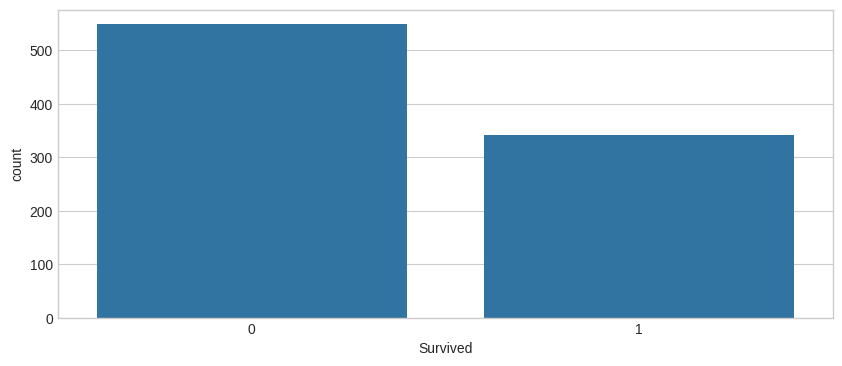

In [ ]:
# perbandingan jumlah penumpang yang selamat
fig = plt.figure(figsize=(10,4))
print(df['Survived'].value_counts())
# df['Survived'].value_counts().plot.bar()
sns.countplot(x='Survived', data=df)

kesimpulan : terlihat dari diagram bar diatas jumlah penumpang yang tidak selamat lebih besar dari yang selamat

male      577
female    314
Name: Sex, dtype: int64


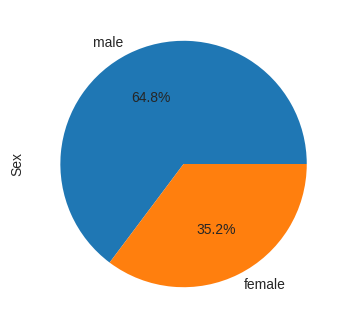

In [ ]:
# perbandingan jenis kelamin penumpang
fig = plt.figure(figsize=(10,4))
# sns.countplot(y='Sex', data=df)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Sex'].value_counts())

kesimpulan : Jumlah penumpang laki-laki jauh lebih banyak dibandingkan perempuan

S    644
C    168
Q     77
Name: Embarked, dtype: int64


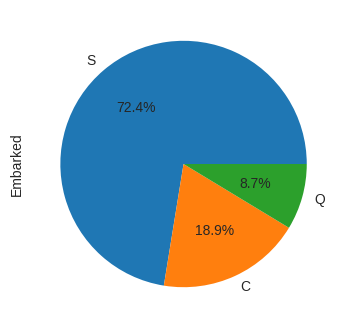

In [ ]:
# perbandingan tempat keberangkatan
fig = plt.figure(figsize=(10,4))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Embarked'].value_counts())

kesimpulan = mayoritas penumpang (72.4%) berangkat dari kota S

3    491
1    216
2    184
Name: Pclass, dtype: int64


<Axes: xlabel='count', ylabel='Pclass'>

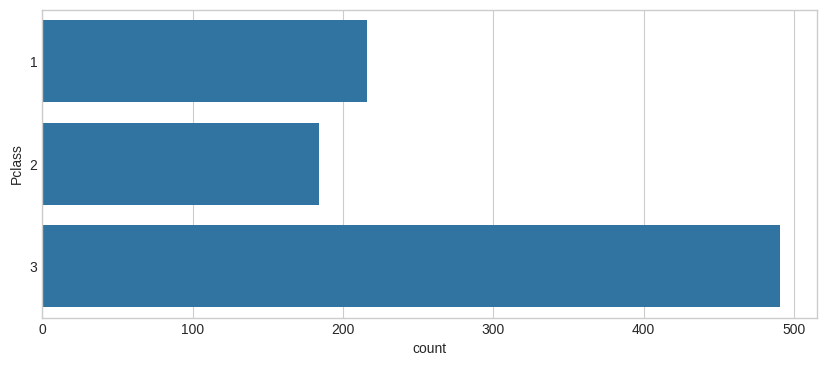

In [ ]:
# Task 1 - Gambarkan Distribusi pclass, gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4))
print(df['Pclass'].value_counts())
sns.countplot(y='Pclass', data=df)

Kesimpulan : jumlah penumpang kelas 3 lebih banyak dari pada penumpang kelas 1 dan 2

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

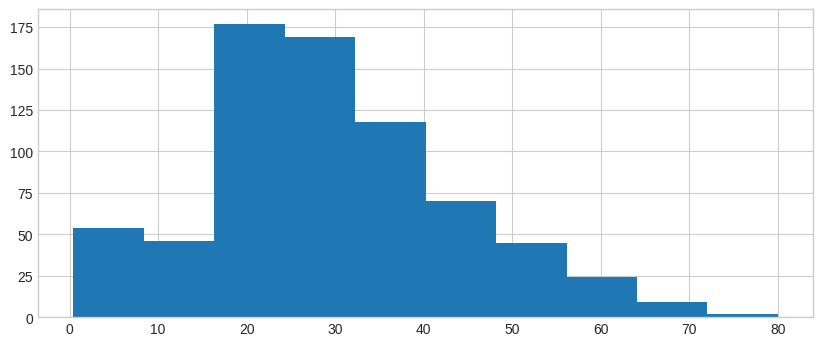

In [ ]:
# Task 2 - Gambarkan Distribusi umur seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4))
plt.hist(x='Age', data=df)



Kesimpulan : distribusi paling banyak umur 20-30tahun

<Axes: xlabel='Fare', ylabel='Count'>

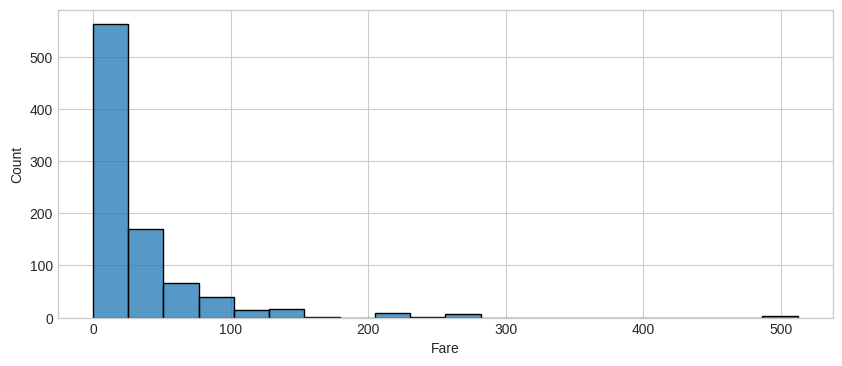

In [ ]:
# Task 3 - Gambarkan Distribusi fare seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4))
sns.histplot(x='Fare', data=df, bins=20)


Kesimpulan : Outlier nya 500


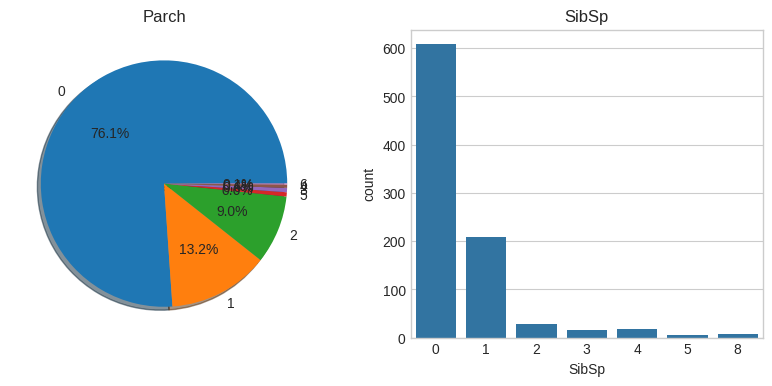

In [ ]:
#persebaran Parch & SibSp
f,ax=plt.subplots(1,2,figsize=(10,4))
df['Parch'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Parch')
ax[0].set_ylabel('')
sns.countplot(x='SibSp',data=df,ax=ax[1])
ax[1].set_title('SibSp')
plt.show()

kesimpulan : mayoritas penumpang adalah solo traveler

## Bivariate Analysis for Survived

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<ipython-input-15-7700348ec1fc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)


<Axes: >

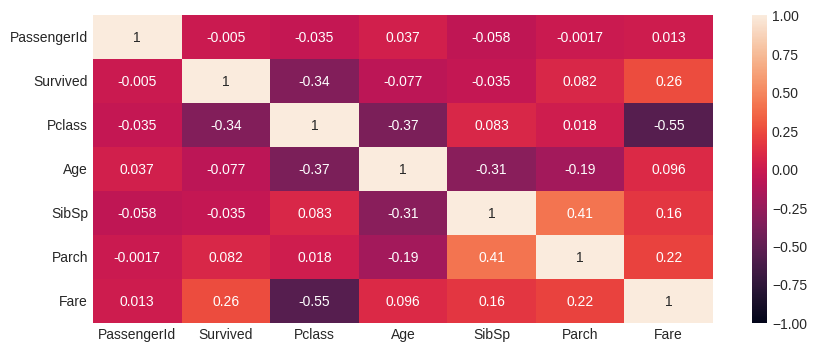

In [ ]:
# Task 4 : tampilkan heatmap correlation untuk kolom 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'
# dan tuliskan kesimpulan yang menarik dari heatmap tersebut
fig = plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)

Kesimpulan : dari hasil fare dan pclass terbanding terbalik disimpulkan semakin mahal yang dibayarkan maka kemungkinan selamat semakin besar

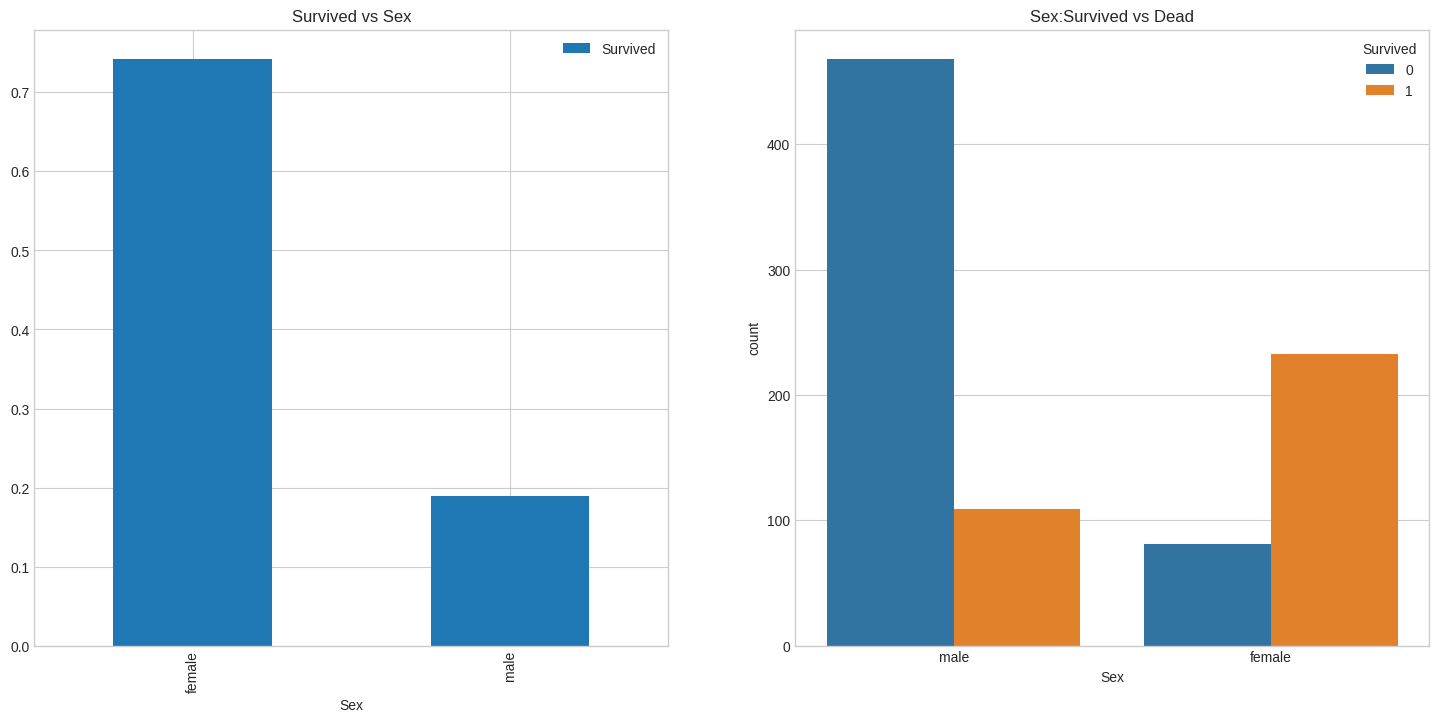

In [ ]:
# Perbandingan Sex dengan Survived
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Kesimpulan : pada plot di atas memiliki distribusi yang berbeda antara male dan female, dimana mayoritas male tidak selamat sedangkan mayoritas female selamat

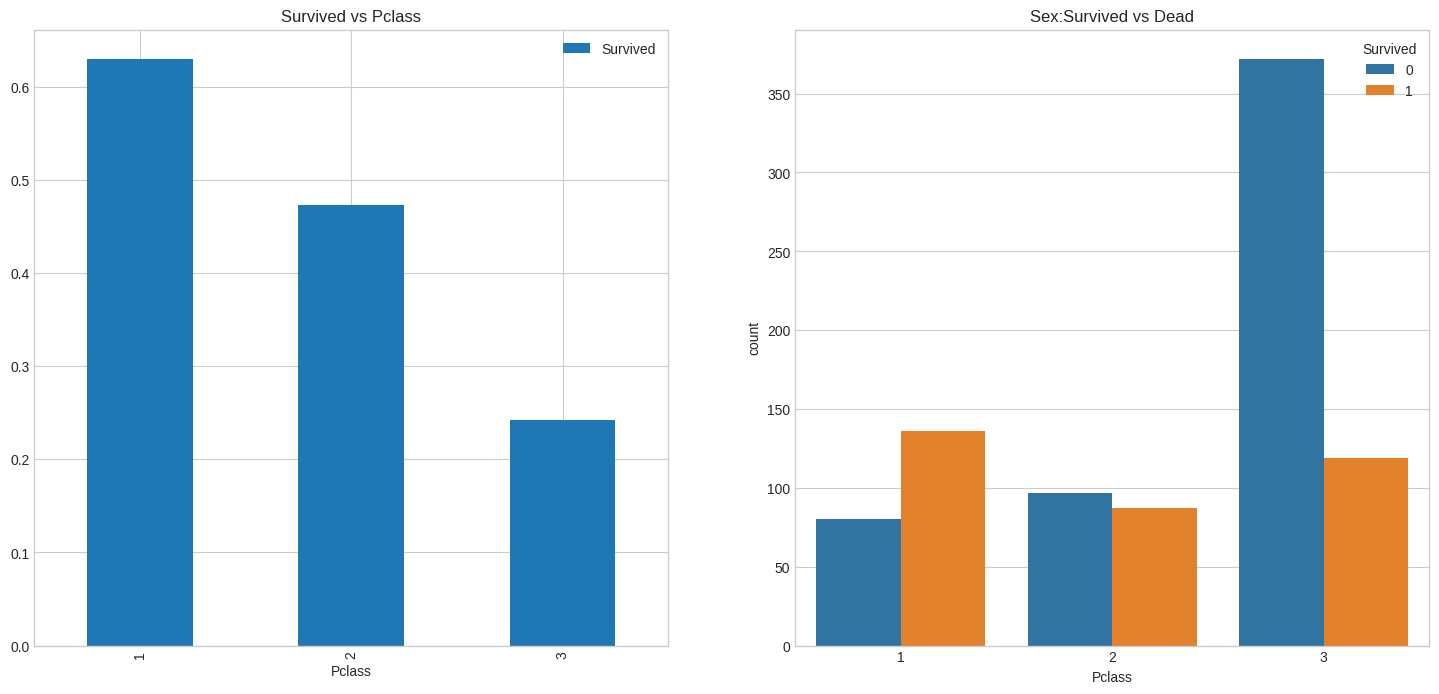

In [ ]:
# Task 5 - Gambarkan Distribusi perbandingan antara Pclass dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Kesimpulan : dari plot distribusi diatas menerangkan bahwa penumpang kelas 1 banyak yang survived, sedangkan penumpang kelas 1 paling rendah untuk survived

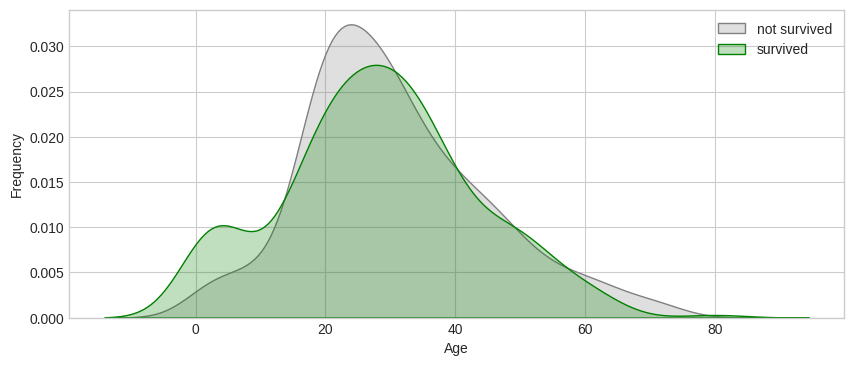

In [ ]:
# Perbandingan Age dengan Survived dengan Kernel Density Plot
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='green',fill=True, label='survived')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.legend()

Kesimpulan : Tidak ada yang perbedaan yang terlihat plot ini, kecuali bagian paling kiri distribusinya. Ini mungkin mengisyaratkan kemungkinan bahwa anak-anak dan bayi menjadi prioritas.

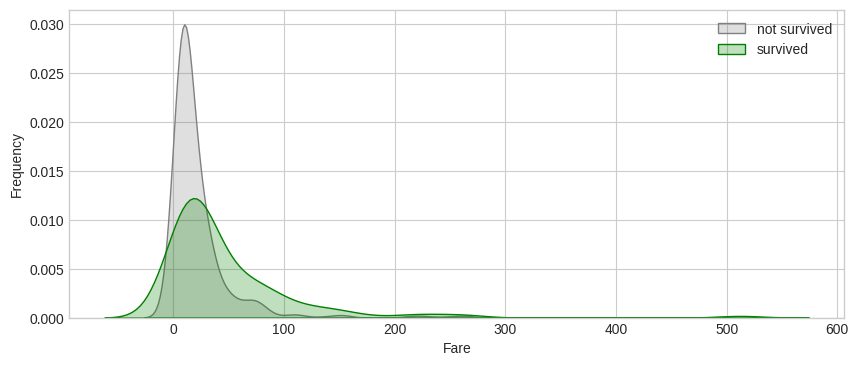

In [ ]:
# Task 6 - Gambarkan Distribusi perbandingan antara Fare dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='green',fill=True, label='survived')
plt.xlabel("Fare")
plt.ylabel('Frequency')
plt.legend()

## Multivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

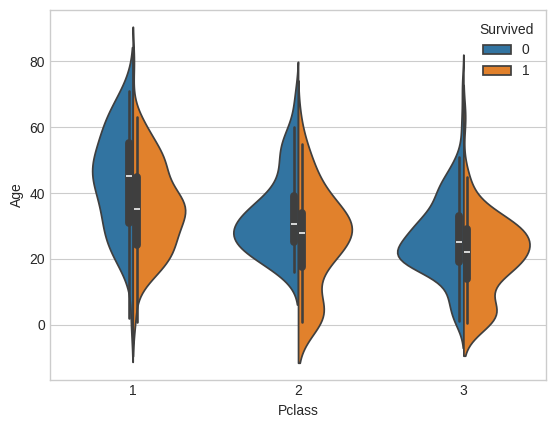

In [ ]:
# Analisis Pclass, Age dan Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

<Axes: xlabel='Sex', ylabel='Age'>

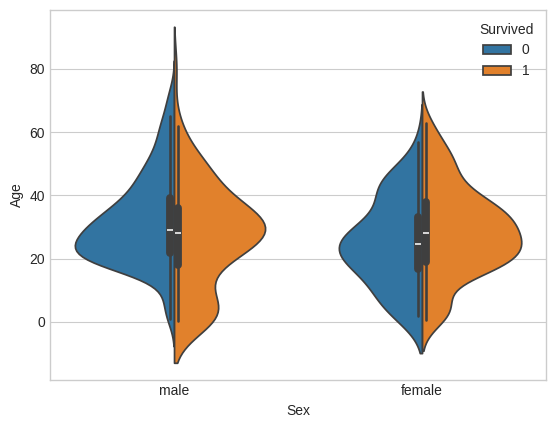

In [ ]:
# Analisis Sex, Age dan Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

In [ ]:
# Task 7-10 Buatlah tambahan 4 plot analisa, Anda dibebaskan untuk membuat data visualisasi
# dengan kombinasi data yang berbeda untuk menemukan informasi menarik mengenai dataset Titanic ini
# dan berikan kesimpulan Anda terhadap analisa yang anda buat

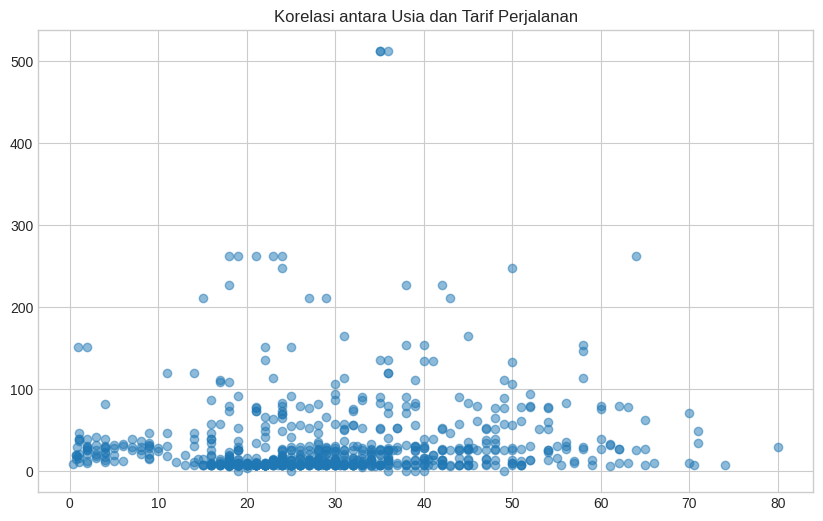

In [ ]:
#Task 7- Analisis Age dan Fare
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Korelasi antara Usia dan Tarif Perjalanan')
plt.grid(True)
plt.show()


 Kesimpulan : Terlihat adanya 2 titik yang jauh dari sebagian besar data, menandakan adanya outliers. yang mana ada penumpang yang membayar tarif perjalanan yang sangat tinggi, jadi umur penumpang tidak berpengaruh terhadap tarif perjalan.

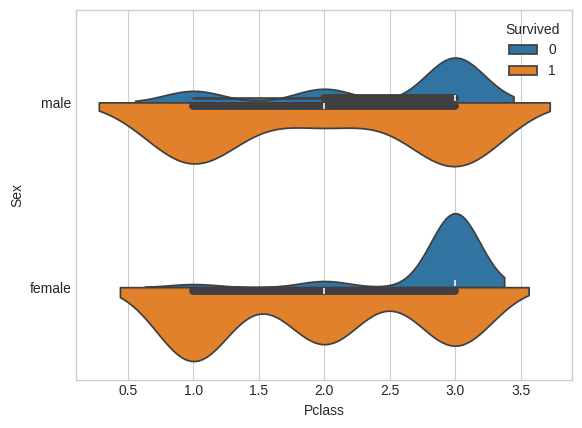

In [ ]:
#Task 8 - Analisis Pclass, Sex dan Fare
sns.violinplot(x="Pclass", y="Sex", hue="Survived", data=df, split=True)
plt.show()

Kesimpulan : penumpang wanita dari semua kelas memiliki tingkat survived  yang lebih tinggi daripada pria, dan penumpang kelas pertama memiliki tingkat survived yang paling tinggi, diikuti oleh kelas kedua dan ketiga.

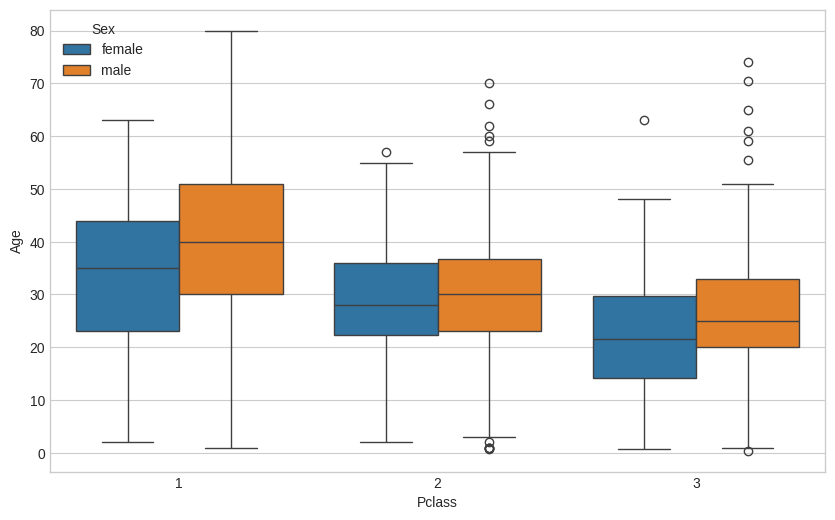

In [ ]:
# Task - 9 Analisis Pclass, Age, dan Sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.show()

Kesimpulan : Penumpang kelas pertama cenderung memiliki usia rata-rata yang lebih tua daripada penumpang kelas kedua dan ketiga. Hal ini terlihat dari median yang lebih tinggi pada box plot untuk kelas pertama.


<ipython-input-93-4710fc201b03>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df, ci=None)


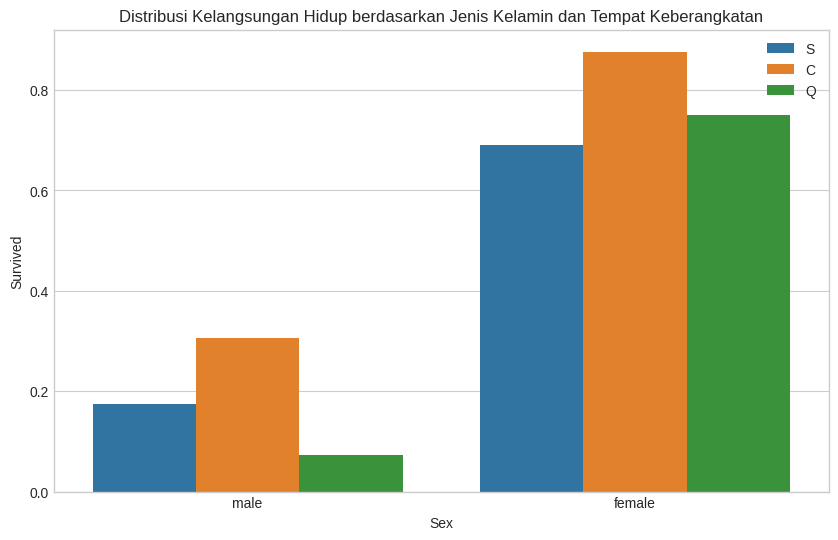

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df, ci=None)
plt.title('Distribusi Kelangsungan Hidup berdasarkan Jenis Kelamin dan Tempat Keberangkatan')
plt.legend()
plt.show()


Kesimpulan : Proporsi kelangsungan hidup penumpang yang berangkat dari Cherbourg (C) cenderung lebih tinggi daripada penumpang dari tempat keberangkatan lainnya, terutama untuk penumpang wanita.